​	其实分类问题和回归问题最主要的区别在于，对回归问题来说通过全连接层之后就可以直接通过MSE损失函数来计算模型预测值与实际值之间的误差，然后通过计算梯度来更新参数。

​	而分类问题，在全连接层之后还需要通过sigmoid函数，目的是将输出归一化到(0,1)范围内，然后通过最大似然函数来计算预测值与实际值的误差，从而计算梯度更新参数。所以，模型最终输出是一个(0,1)范围内的概率值。

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid (x):
    return 1/(1+np.exp(x))

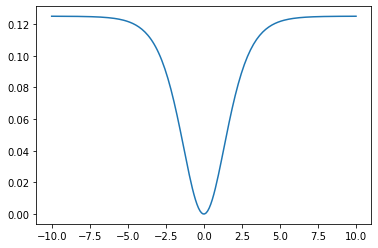

In [41]:
# MSE损失函数 fx = 0.5(z-y)^2 x轴表示z的取值，y轴表示代价函数f(x)，因为对于而分类问题来说，数据的真实标签y只能是0或1，
# 不过为了让大家能够更好的观察出f(x)随x的变化，我们将y的取值为0.5

x = np.linspace(-10, 10, 200) 
fx = 0.5*(sigmoid(x)-0.5)**2
# plt.figure(dpi=200)
plt.plot(x,fx)


通过MSE代价函数图像可以发现，它是一个凹函数最小值为0，不过大家仔细观察可以发现当z小于-2.5或z大于2.5时，代价函数的梯度(斜率)几乎接近于0(直线)，所以如果在这个区间参数的更新会将会非常慢。
接下来我们分析当真实值y取1时，绘制绝对误差与参数梯度之间的关系如下图，因为误差范围在[0,1]之间所以只需要考虑误差在[0,1]区间内，参数梯度的变化

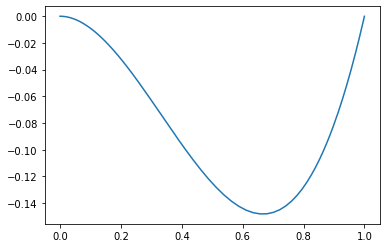

In [42]:
# 假设我们y的标签是1

x = np.linspace(-10, 10, 200) 
dfx = (sigmoid(x)-1)*sigmoid(x)*(1-sigmoid(x))
# plt.figure(dpi=200)
plt.plot(np.abs(1-sigmoid(x)),dfx)

通过观察误差与参数梯度之间的关系可以发现，当误差大于0.7以后，为了最小化误差A，参数的梯度需要先由大到小，然后再变大才能使得误差A最小化，这样显然不利于模型的训练而且会导致需要更多的时间来迭代，造成更多的硬件资源的浪费。

接下来话最大似然函数的图

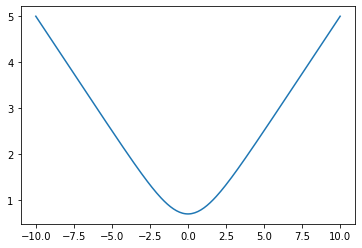

In [43]:
# f(x) = -ylogz - (1-y)log(1-z) 同样取 y=0.5
y = 0.5
x = np.linspace(-10, 10, 200) 
fx = (-y*np.log(sigmoid(x)) ) - ((1-y)*np.log(1-sigmoid(x)))
# plt.figure(dpi=200)
plt.plot(x,fx)

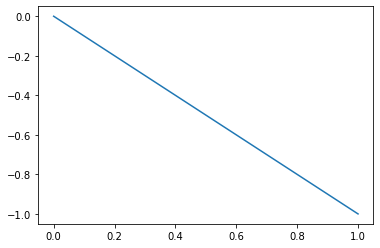

In [44]:
y = 1
x = np.linspace(-10, 10, 200) 
dfx = -y*(1-sigmoid(x))*sigmoid(x)/sigmoid(x) - (-(1-y)*(1-sigmoid(x))*sigmoid(x)/(1-sigmoid(x)))
# dfx = sigmoid(x)-y
# plt.figure(dpi=200)
plt.plot(np.abs(y-sigmoid(x)),dfx)

通过上图可以发现，当误差越大时，参数的梯度越大，参数的更新步伐越大，从而使得模型能够更快收敛。
通过理论分析和代码实践，可以发现在分类问题中使用最大似然函数作为代价函数的两个优点：

最大似然函数作为代价函数时，具有当误差越大时，参数的梯度越大，模型收敛越快
最大似然函数作为代价函数时，真实值与模型预测值之间的误差和参数的梯度呈反比，而均方误差作为代价函数时，真实值与模型预测值之间的误差和参数呈非线性关系，不利于模型的收敛
最大似然函数作为代价函数的梯度区间(梯度大于0)大于以均方误差作为代价函数的梯度区间


In [84]:
import torch
import math
label = torch.tensor([2])
out = torch.tensor([[0.1,0.0,0.8,0.0,0.1]])
loss = torch.nn.CrossEntropyLoss()
loss(out,label)

tensor(1.0619)

In [85]:
out = torch.nn.Softmax()(torch.tensor(out))
out

/var/folders/70/f68hms5512gffmdv178wlrvc0000gn/T/ipykernel_96131/3049631585.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = torch.nn.Softmax()(torch.tensor(out))
/var/folders/70/f68hms5512gffmdv178wlrvc0000gn/T/ipykernel_96131/3049631585.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = torch.nn.Softmax()(torch.tensor(out))


tensor([[0.1717, 0.1554, 0.3458, 0.1554, 0.1717]])

In [53]:
ce = -(1/5*math.log2(0.1787)+1/5*math.log2(0.1787)+1/5*math.log2(0.2665)\
    +1/5*math.log2(0.1975)+1/5*math.log2(0.1787))
ce

2.340206677004882

In [86]:
-torch.log(torch.tensor(0.3458))

tensor(1.0619)

In [64]:
label = torch.tensor([2])
out = torch.tensor([[0.0,0.0,10000.0,0.0,0.0]])
loss = torch.nn.CrossEntropyLoss()
loss(out,label)

tensor(0.)

In [70]:
a = torch.tensor([[0.0,0.0,10000.0,0.0,0.0]])
a = torch.nn.Softmax()(a)
a

/var/folders/70/f68hms5512gffmdv178wlrvc0000gn/T/ipykernel_96131/2125881528.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = torch.nn.Softmax()(a)


tensor([[0., 0., 1., 0., 0.]])